In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [3]:
## Helper functions
def std_deviation(x_arr) -> float:
    mean = np.mean(x_arr)
    std_dev = 0
    for val in x_arr:
        std_dev += np.power(val - mean, 2)
    return np.sqrt(1.0/(len(x_arr) - 1) * std_dev)

def std_error(x_arr) -> float:
    return std_deviation(x_arr) / np.sqrt(len(x_arr))

In [4]:
DATA_PATH = "../Data/"

# Avg. over multiple seeds
n_keys = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
avg_pr_key_insertion_time, avg_pr_key_query_time, avg_max_bucket_len  = [], [], []
counter = 0
for file_name in os.listdir(DATA_PATH):
    if file_name != ".DS_Store":

        data = np.loadtxt(fname=DATA_PATH+file_name, dtype=float)
        insertion_time, max_bucket_len, query_time = data[:,1], data[:,2], data[:,3]

        avg_pr_key_insertion_time.append([insertion_time[i] / data[:,0][i] for i in range(len(data[:,0]))])
        avg_pr_key_query_time.append([query_time[i] / data[:,0][i] for i in range(len(data[:,0]))])
        avg_max_bucket_len.append(max_bucket_len.tolist())

        counter += 1

HWC_avg_max_bucket_len_std_errors = np.array([std_error(np.array(avg_max_bucket_len)[:,i]) for i in range(np.array(avg_max_bucket_len).shape[1])])
HWC_avg_pr_key_insertion_time_std_errors = np.array([std_error(np.array(avg_pr_key_insertion_time)[:,i]) for i in range(np.array(avg_pr_key_insertion_time).shape[1])])
HWC_avg_pr_key_query_time_std_errors = np.array([std_error(np.array(avg_pr_key_query_time)[:,i]) for i in range(np.array(avg_pr_key_query_time).shape[1])])

HWC_avg_max_bucket_len = np.mean(np.array(avg_max_bucket_len),axis=0)
HWC_avg_pr_key_insertion_time = np.mean(np.array(avg_pr_key_insertion_time),axis=0)
HWC_avg_pr_key_query_time = np.mean(np.array(avg_pr_key_query_time),axis=0)

In [5]:
DATA_PATH = "../Data/RedBlackTree/"

# Avg. over multiple seeds
n_keys = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
avg_pr_key_insertion_time, avg_pr_key_query_time  = [], []
counter = 0
for file_name in os.listdir(DATA_PATH):
    if file_name != ".DS_Store":

        data = np.loadtxt(fname=DATA_PATH+file_name, dtype=float)
        insertion_time, query_time = data[:,1], data[:,2]

        avg_pr_key_insertion_time.append([insertion_time[i] / data[:,0][i] for i in range(len(data[:,0]))])
        avg_pr_key_query_time.append([query_time[i] / data[:,0][i] for i in range(len(data[:,0]))])

        counter += 1

RBT_avg_pr_key_insertion_time_std_errors = np.array([std_error(np.array(avg_pr_key_insertion_time)[:,i]) for i in range(np.array(avg_pr_key_insertion_time).shape[1])])
RBT_avg_pr_key_query_time_std_errors = np.array([std_error(np.array(avg_pr_key_query_time)[:,i]) for i in range(np.array(avg_pr_key_query_time).shape[1])])

RBT_avg_pr_key_insertion_time = np.mean(np.array(avg_pr_key_insertion_time),axis=0)
RBT_avg_pr_key_query_time = np.mean(np.array(avg_pr_key_query_time),axis=0)

In [6]:
DATA_PATH = "../Data/PerfectHashing/"

# Avg. over multiple seeds
n_keys = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
avg_pr_key_insertion_time, avg_pr_key_query_time  = [], []
counter = 0
for file_name in os.listdir(DATA_PATH):
    if file_name != ".DS_Store":

        data = np.loadtxt(fname=DATA_PATH+file_name, dtype=float)
        insertion_time, query_time = data[:,1], data[:,2]

        avg_pr_key_insertion_time.append([insertion_time[i] / data[:,0][i] for i in range(len(data[:,0]))])
        avg_pr_key_query_time.append([query_time[i] / data[:,0][i] for i in range(len(data[:,0]))])

        counter += 1

PH_avg_pr_key_insertion_time_std_errors = np.array([std_error(np.array(avg_pr_key_insertion_time)[:,i]) for i in range(np.array(avg_pr_key_insertion_time).shape[1])])
PH_avg_pr_key_query_time_std_errors =np.array([std_error(np.array(avg_pr_key_query_time)[:,i]) for i in range(np.array(avg_pr_key_query_time).shape[1])])

PH_avg_pr_key_insertion_time = np.mean(np.array(avg_pr_key_insertion_time),axis=0)
PH_avg_pr_key_query_time = np.mean(np.array(avg_pr_key_query_time),axis=0)

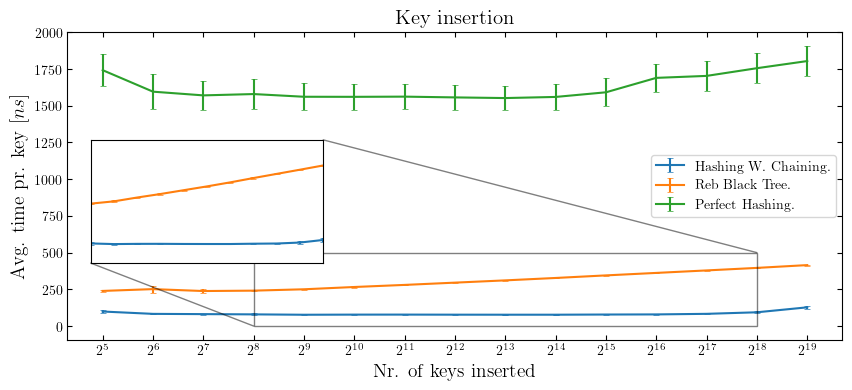

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.set_title("Key insertion", size=15)

error_scale_factor = 10

#ax.plot(n_keys, HWC_avg_pr_key_insertion_time, label='Hashing W. Chaining.')
ax.errorbar(n_keys, HWC_avg_pr_key_insertion_time, yerr=HWC_avg_pr_key_insertion_time_std_errors*error_scale_factor,
               label='Hashing W. Chaining.',capsize=2.1, capthick=0.5)

#ax.plot(n_keys, RBT_avg_pr_key_insertion_time, label='Reb Black Tree.')
ax.errorbar(n_keys, RBT_avg_pr_key_insertion_time, yerr=RBT_avg_pr_key_insertion_time_std_errors*error_scale_factor,
               label='Reb Black Tree.',capsize=2.1, capthick=0.5)

#ax.plot(n_keys, PH_avg_pr_key_insertion_time, label='Perfect Hashing.')
ax.errorbar(n_keys, PH_avg_pr_key_insertion_time, yerr=PH_avg_pr_key_insertion_time_std_errors*error_scale_factor,
               label='Perfect Hashing.',capsize=2.1, capthick=0.5)


################## miniplot ##################
# inset axes....
axins_x_left, axins_y_lower, axins_x_width, axins_height = 0.03, 0.25, 0.30, 0.40
axins = ax.inset_axes([axins_x_left, axins_y_lower, axins_x_width, axins_height])
axins.errorbar(n_keys[3:len(n_keys)-1],HWC_avg_pr_key_insertion_time[3:len(n_keys)-1],yerr=HWC_avg_pr_key_insertion_time_std_errors[3:len(n_keys)-1]*error_scale_factor,
               label='Quantagonia',capsize=2.1, capthick=0.5)
axins.errorbar(n_keys[3:len(n_keys)-1],RBT_avg_pr_key_insertion_time[3:len(n_keys)-1],yerr=RBT_avg_pr_key_insertion_time_std_errors[3:len(n_keys)-1]*error_scale_factor,
               label='Dwave simulated annealing',capsize=2.1, capthick=0.5)


# sub region of the original image
x1, x2, y1, y2 = 2**8, 2**18, 0, 500
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_title(' ',size=16)
axins.set_yticks([])
axins.set_xscale('log',base=2)
axins.set_xticks([])
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlabel("Nr. of keys inserted", size=14)
ax.set_ylabel(r"Avg. time pr. key $[ns]$", size=14)
ax.set_xscale('log',base=2)
ax.set_xticks(n_keys)
ax.set_xticklabels(['$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])

ax.legend()
plt.savefig("key_insertion.pdf")
plt.show()

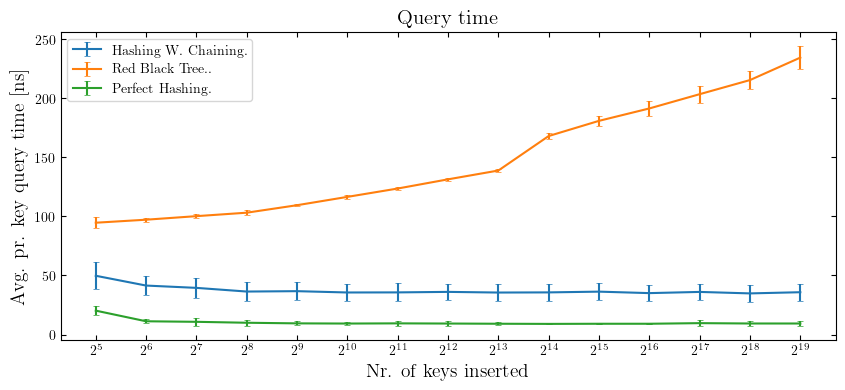

In [172]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.set_title("Query time", size=15)

#ax.plot(n_keys, HWC_avg_pr_key_query_time, label='Hashing W. Chaining.')
ax.errorbar(n_keys, HWC_avg_pr_key_query_time, yerr=HWC_avg_pr_key_query_time_std_errors*error_scale_factor,
               label='Hashing W. Chaining.',capsize=2.1, capthick=0.5)

#ax.plot(n_keys, RBT_avg_pr_key_query_time, label='Red Black Tree.')
ax.errorbar(n_keys, RBT_avg_pr_key_query_time, yerr=RBT_avg_pr_key_query_time_std_errors*error_scale_factor,
               label='Red Black Tree..',capsize=2.1, capthick=0.5)

#ax.plot(n_keys, PH_avg_pr_key_query_time, label='Perfect Hashing.')
ax.errorbar(n_keys, PH_avg_pr_key_query_time, yerr=PH_avg_pr_key_query_time_std_errors*error_scale_factor,
               label='Perfect Hashing.',capsize=2.1, capthick=0.5)

ax.set_xlabel("Nr. of keys inserted", size=14)
ax.set_ylabel(r"Avg. pr. key query time [ns]", size=14)
ax.set_xscale('log', base=2)
ax.set_xticks(n_keys)
ax.set_xticklabels(['$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax.legend()
plt.savefig("query_time.pdf")
plt.show()

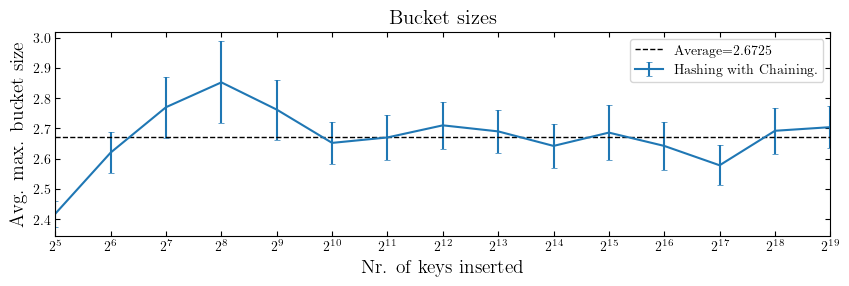

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.set_title("Bucket sizes", size=15)
fig.subplots_adjust(bottom=0.2)

#ax.plot(n_keys, HWC_avg_max_bucket_len,label="Hashing with Chaining.")
ax.errorbar(n_keys, HWC_avg_max_bucket_len, yerr=HWC_avg_max_bucket_len_std_errors,
               label='Hashing with Chaining.',capsize=2.1, capthick=0.5)
ax.hlines(np.mean(HWC_avg_max_bucket_len),2**5,2**(19),ls='--',lw=1,color='k',label=f'Average={np.round(np.mean(HWC_avg_max_bucket_len),4)}')

ax.set_xlabel("Nr. of keys inserted", size=14)
ax.set_ylabel(r"Avg. max. bucket size", size=14)
ax.set_xscale('log', base=2)
ax.set_xlim(2**5,2**(19))
ax.set_xticks(n_keys)
ax.set_xticklabels(['$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax.legend()
plt.savefig("max_bucket_size.pdf")
plt.show()